In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h6>Design

In [2]:
# Design

# Colors

sns.color_palette("Accent")

# Sizes

title_size = 50
tick_size = 30
text_size = 30

<h6>Functions

In [3]:
def return_missing_values_df_bar(df, bars=True):
    
    """display nans in percent"""
    
    missing_percent_df = \
        pd.DataFrame(100 - (df.count()/df.shape[0])*100, columns=['Missing Values'])
    
    if bars:
        
        return missing_percent_df[missing_percent_df['Missing Values'] > 0]\
                    .style.bar(color=sns.color_palette('cividis').as_hex()[3])
    else:
        
        return missing_percent_df[missing_percent_df['Missing Values'] > 0]

<h6>Set up

In [4]:
# Sets the Ipython options

InteractiveShell.ast_node_interactivity = "all"

In [5]:
df = pd.read_csv(r'/mnt/d/Kaggle/Telecom_Churn_Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

<h6>Overview

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.dtypes.sort_values()

SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
customerID           object
PaymentMethod        object
PaperlessBilling     object
Contract             object
StreamingMovies      object
StreamingTV          object
TechSupport          object
DeviceProtection     object
OnlineBackup         object
OnlineSecurity       object
InternetService      object
MultipleLines        object
PhoneService         object
Dependents           object
Partner              object
gender               object
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
# Imablanced data

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
# No missing values

return_missing_values_df_bar(df, bars=True)

,Missing Values


<h6><center>Cleanings

In [13]:
# Totalcharges' missing values

df[df['TotalCharges'] == ' ']

# tenure * MonthlyCharges <≈ TotalCharges (a little bit less)

df[['tenure','MonthlyCharges','TotalCharges']]

# Imputation

df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.nan if x == ' ' else x)

df['TotalCharges'] = df['TotalCharges'].astype('float')

# => 0*MonthlyCharges

df[df['TotalCharges'].isna()]['tenure']

df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.5
7039,72,103.20,7362.9
7040,11,29.60,346.45
7041,4,74.40,306.6


488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

In [14]:
# tenure type

df['tenure'] = df['tenure'].astype('int')

<center><h6>Univariate analysis

<h6>Categorical

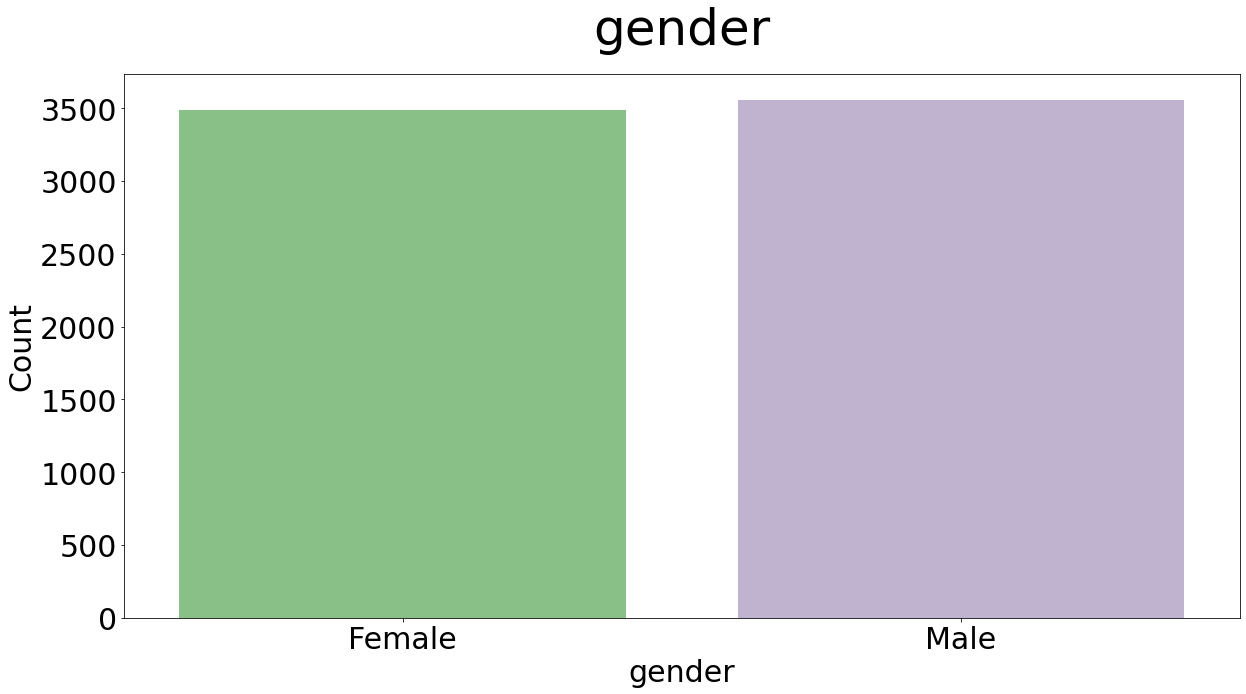

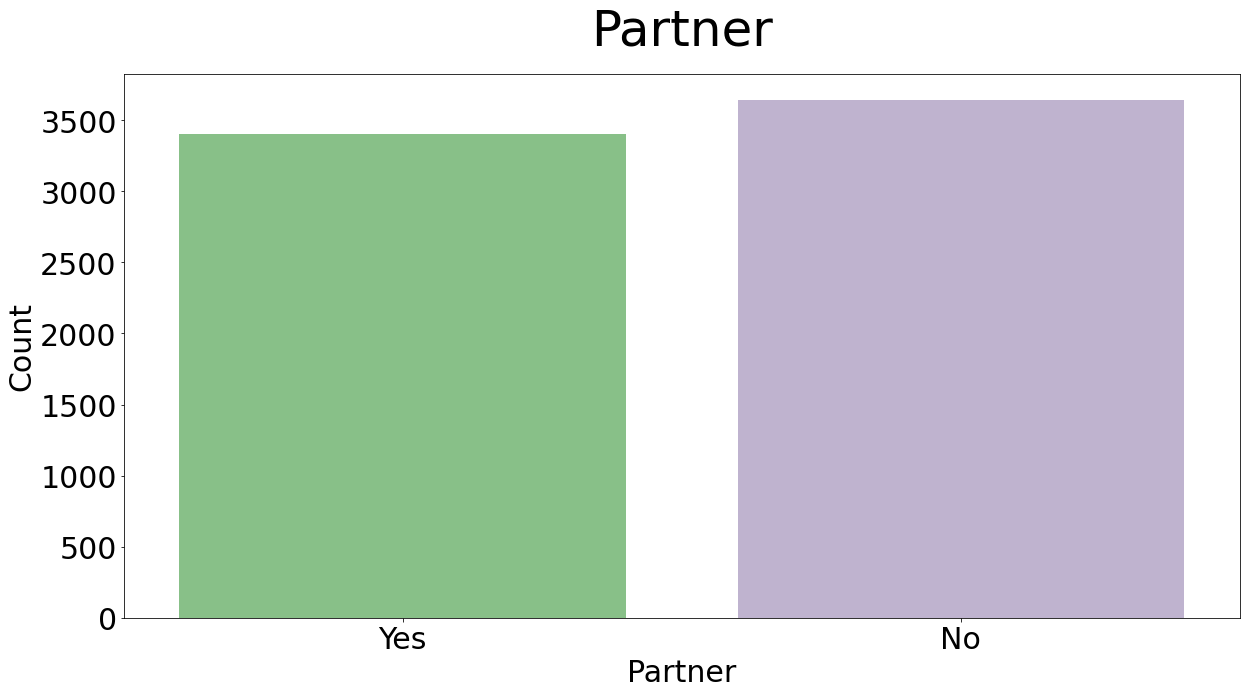

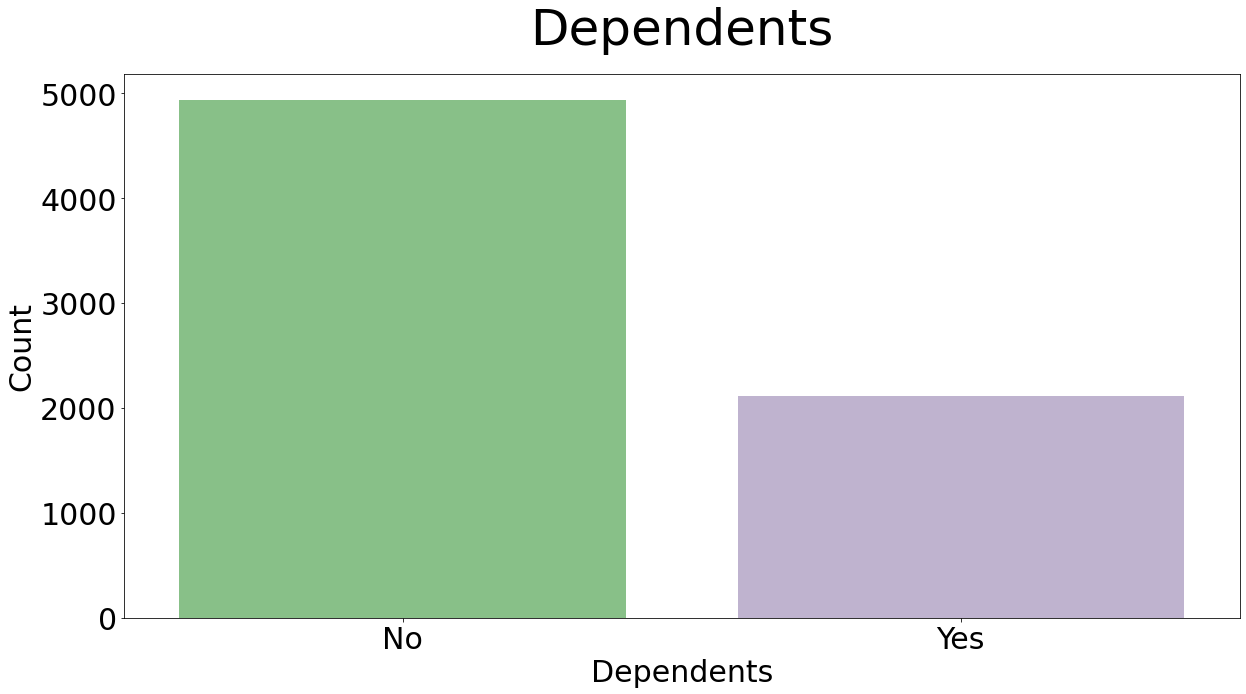

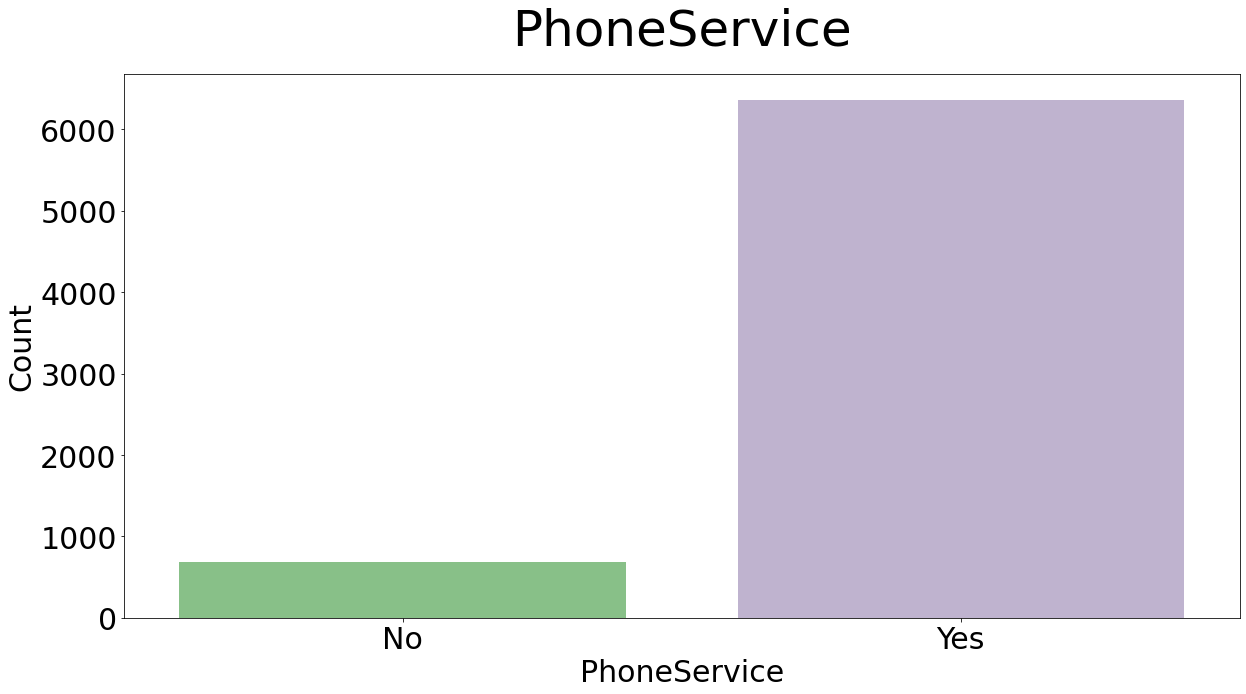

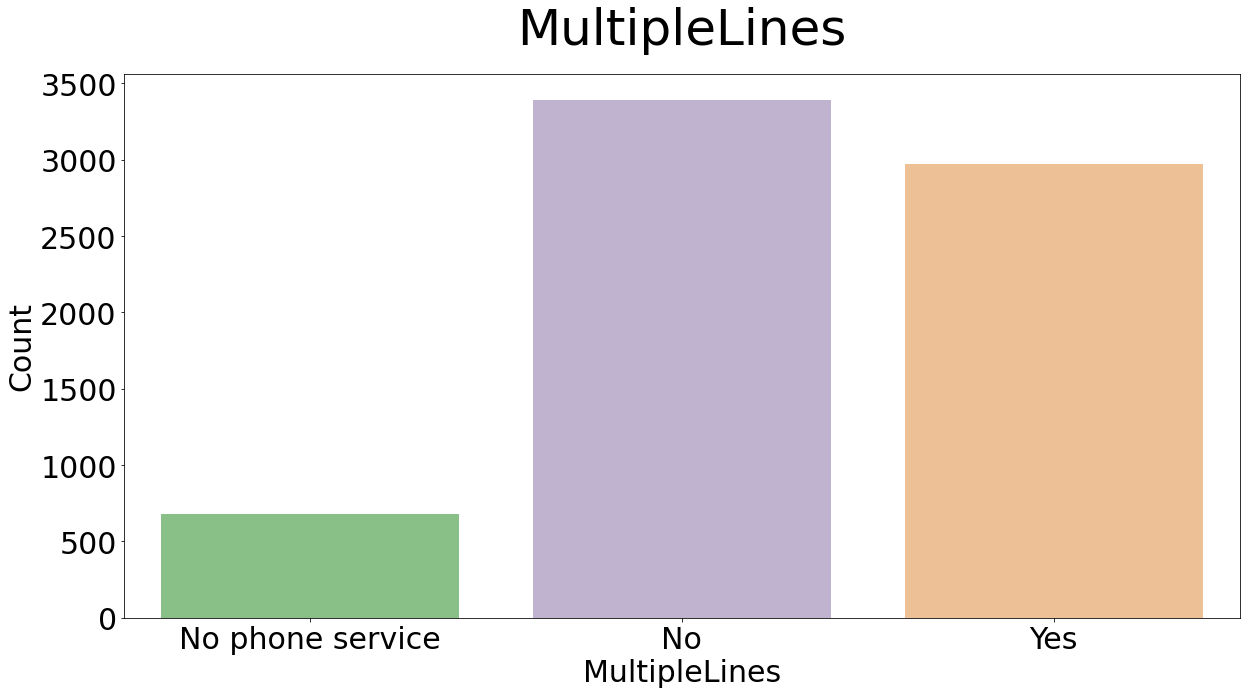

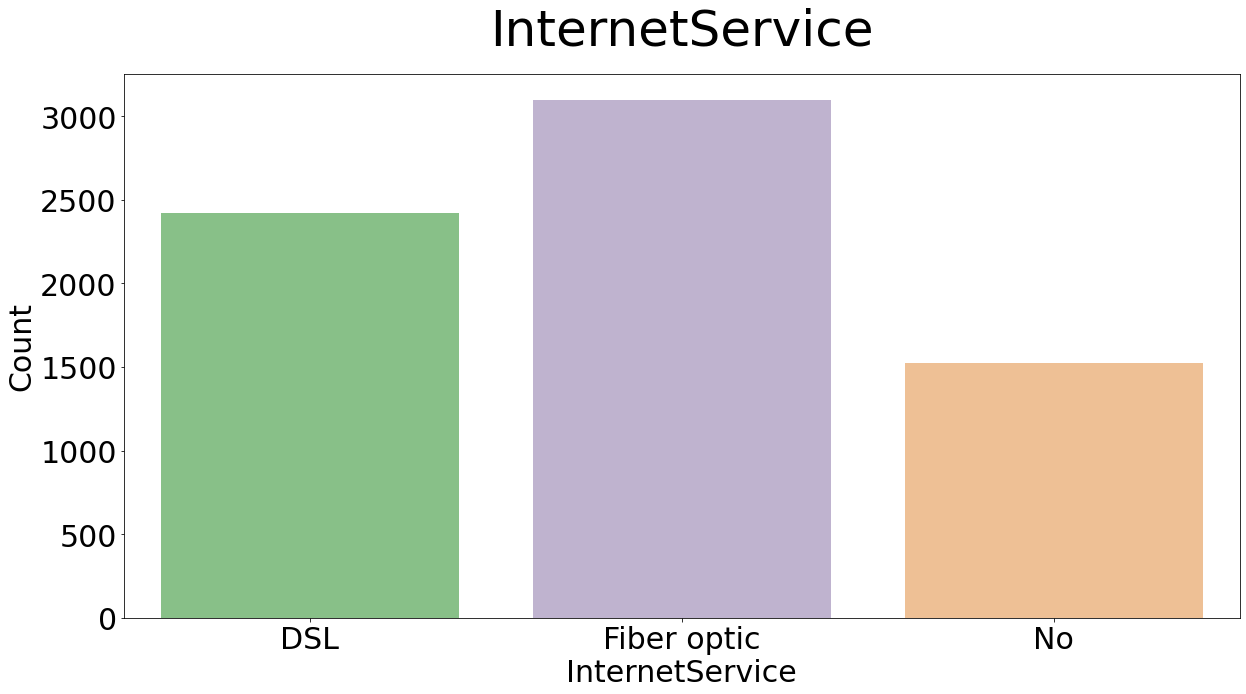

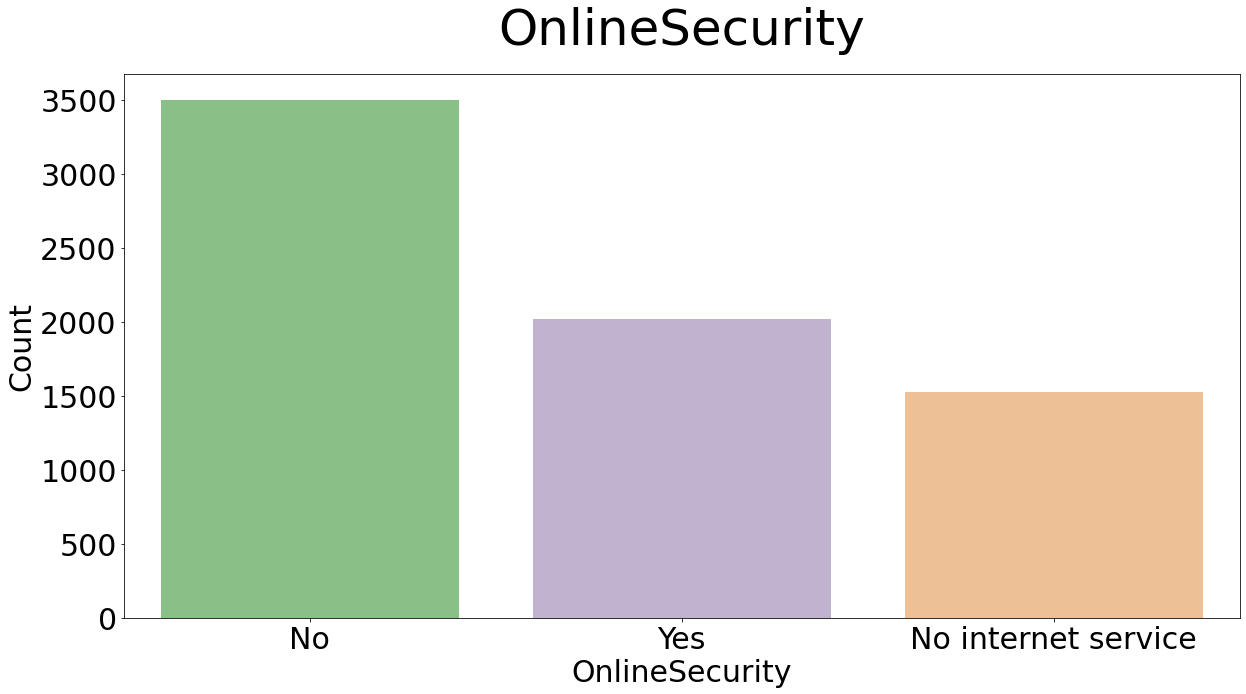

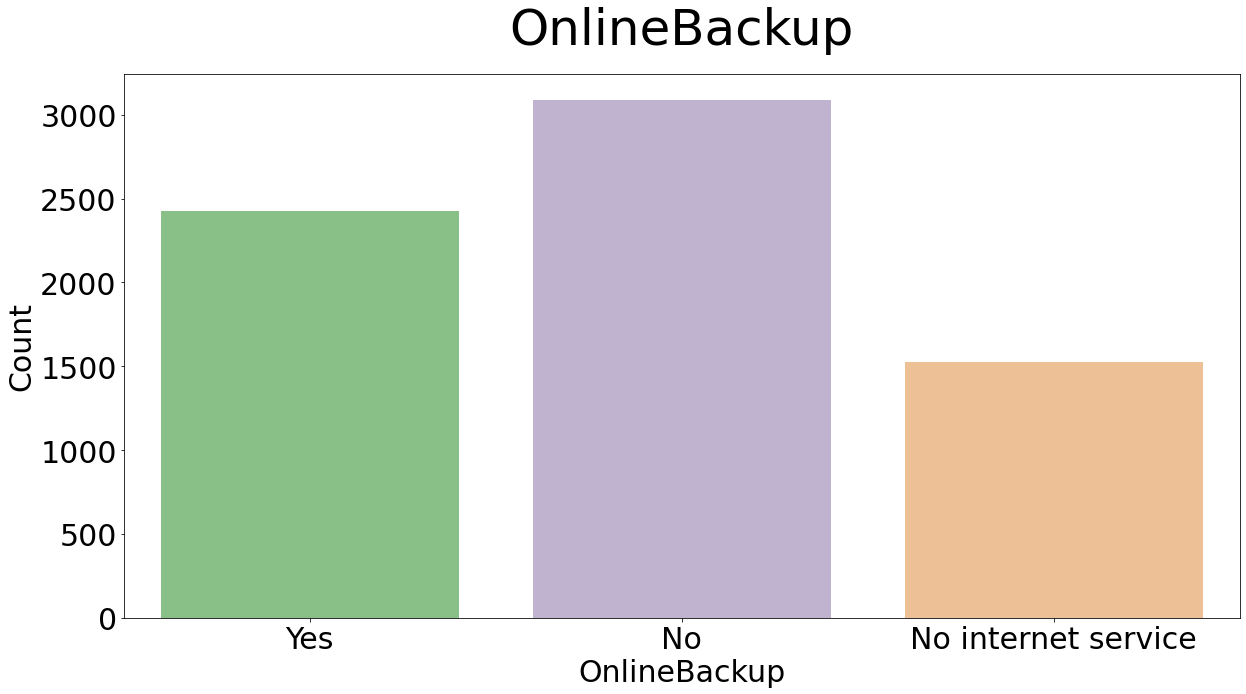

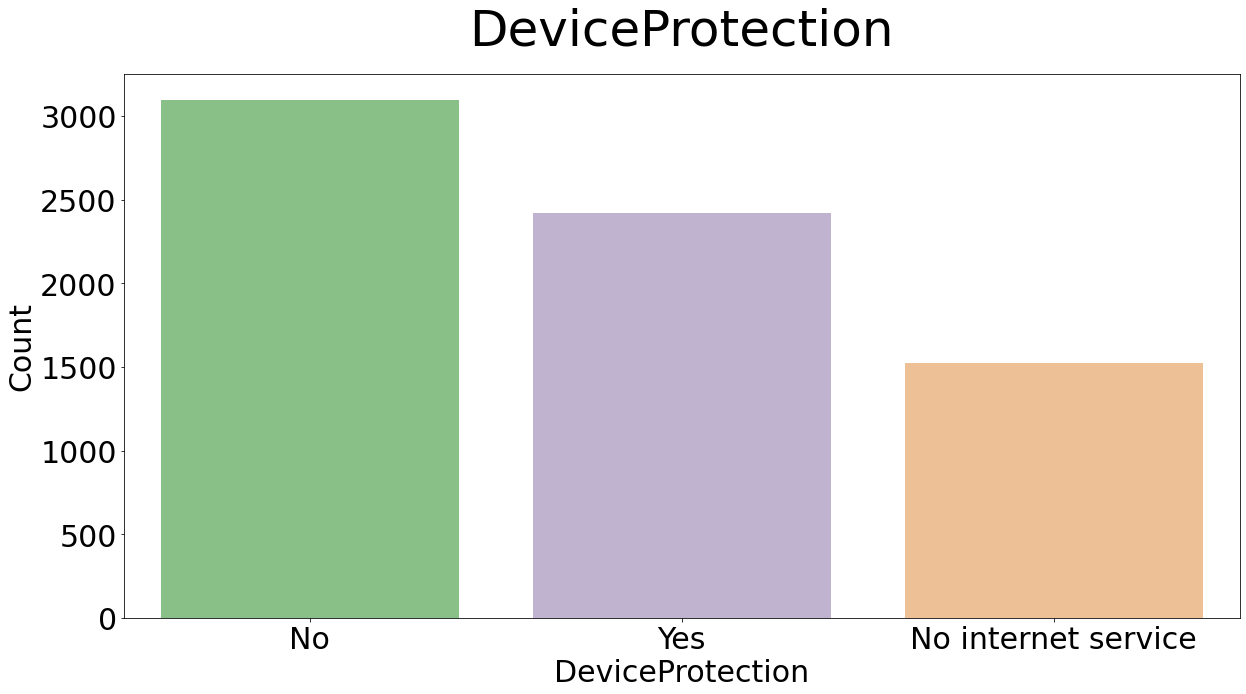

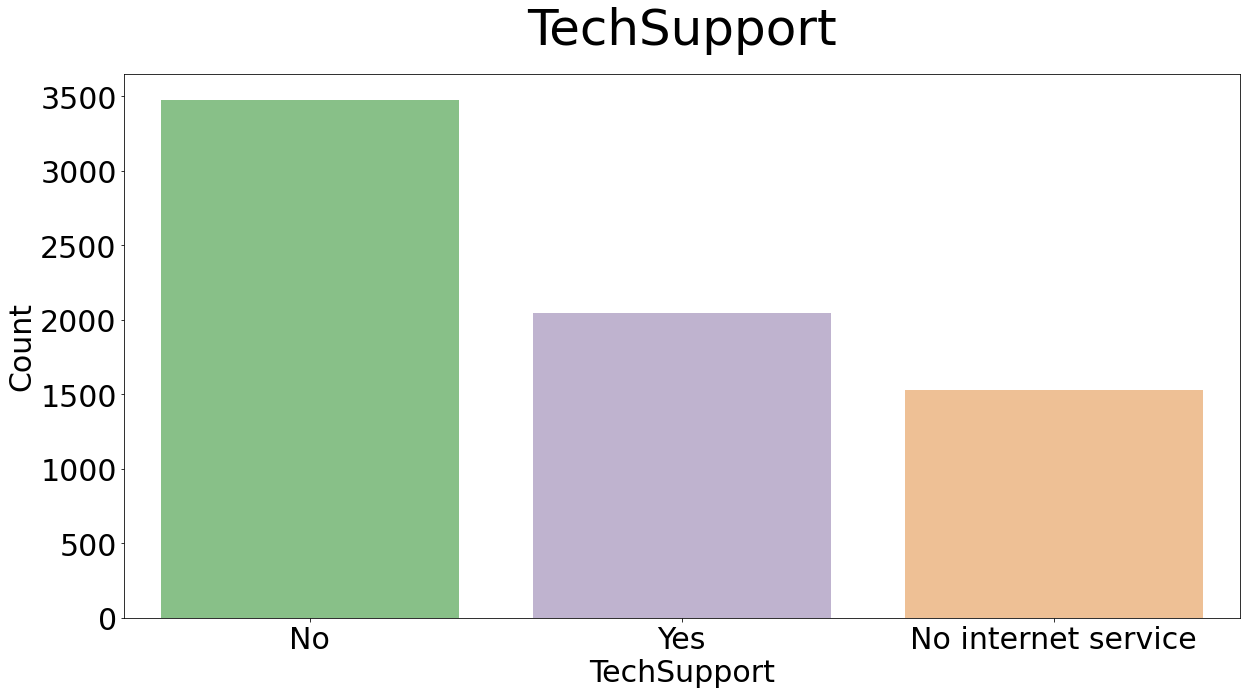

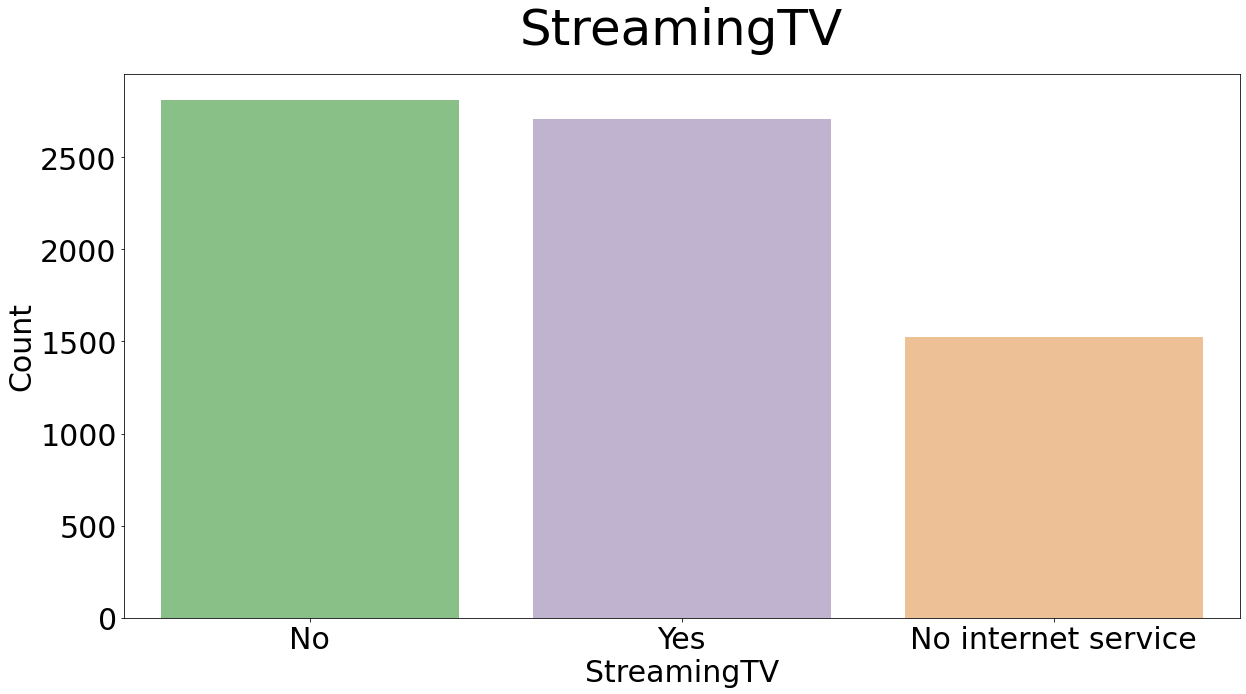

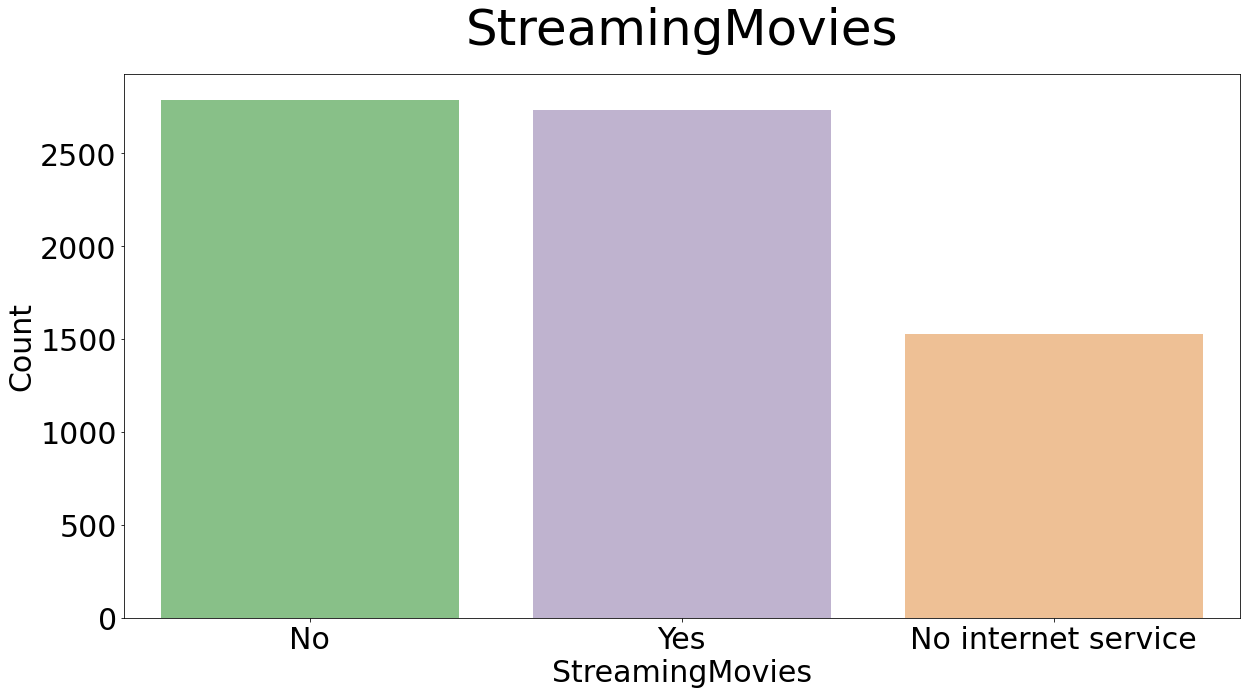

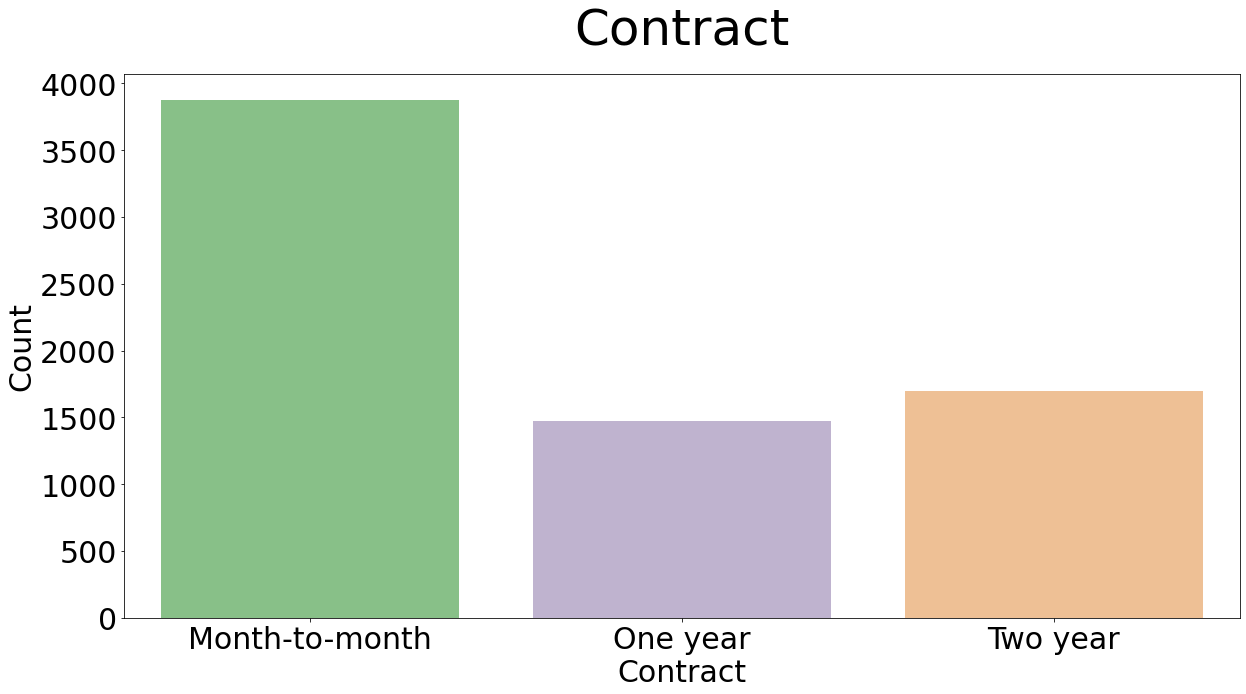

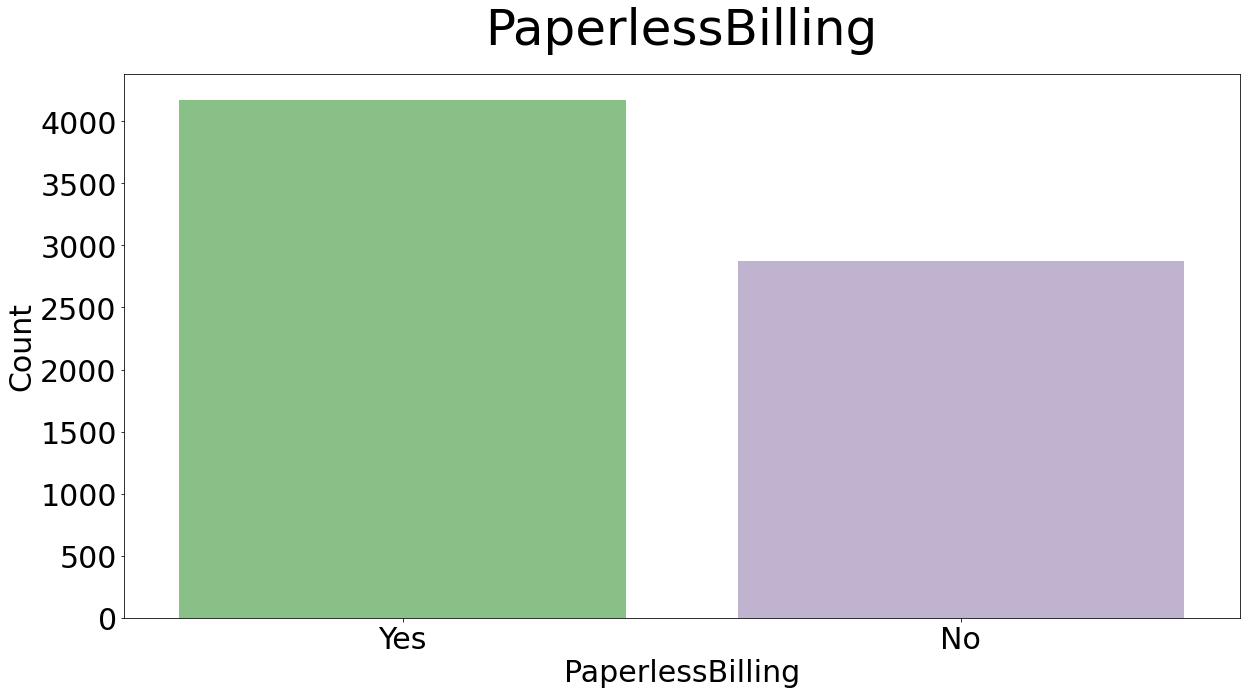

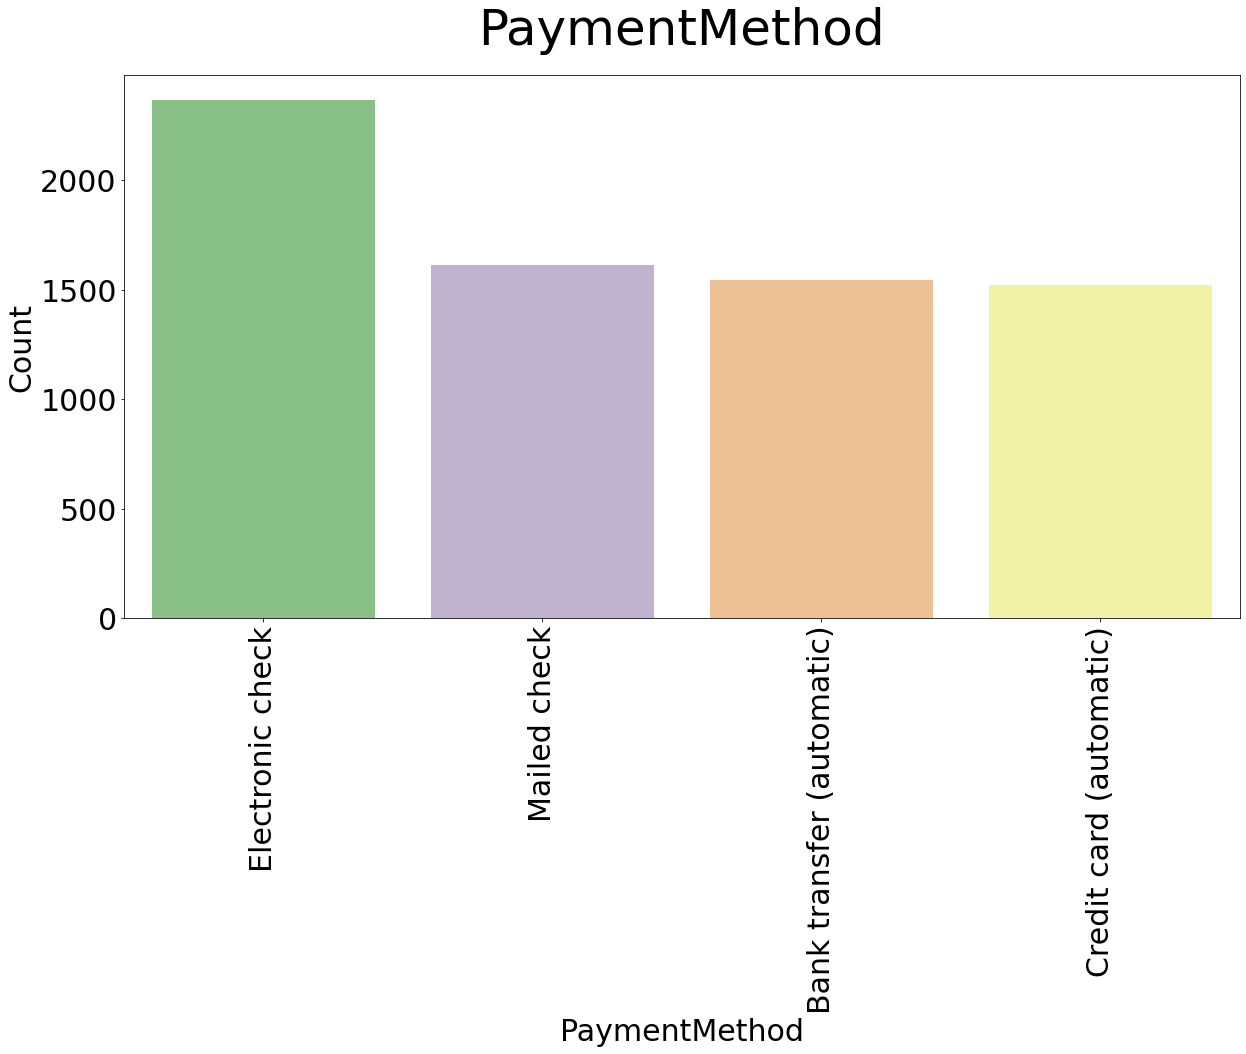

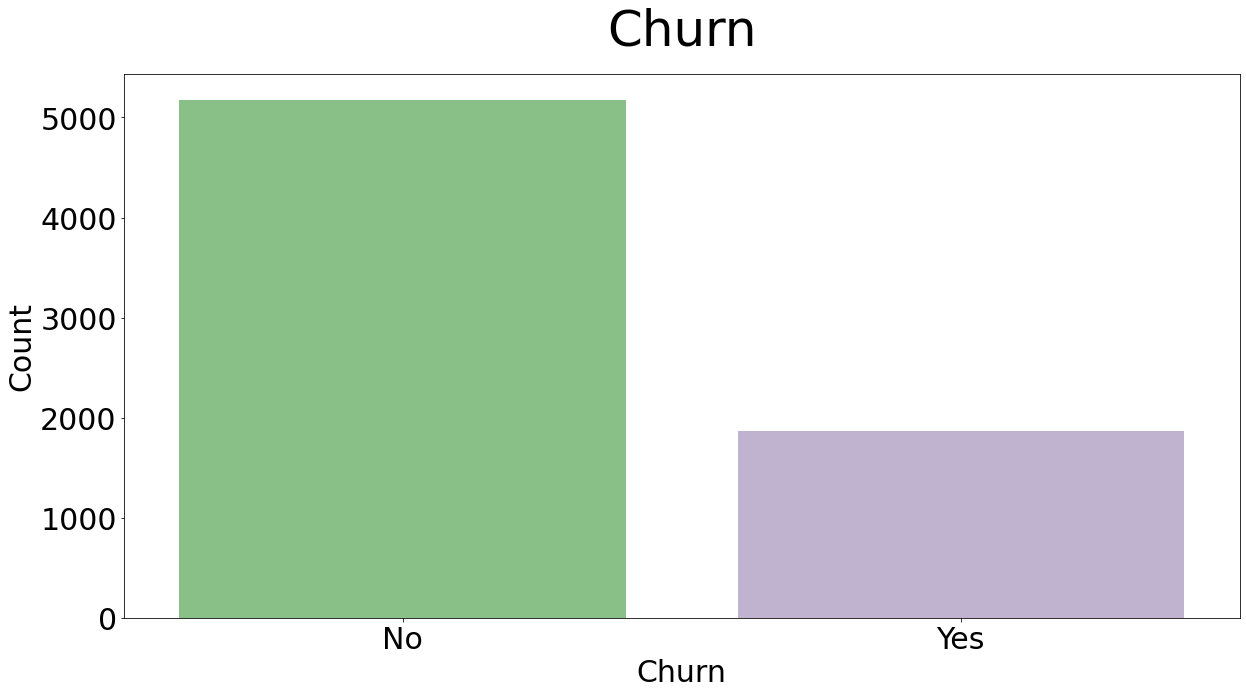

In [15]:
for j in [i for i in df.select_dtypes('object').columns if i not in ['customerID']]:
    
    nuniques = df[j].nunique()
    
    fig, ax = plt.subplots(figsize = (20,10))
    sns.countplot(data = df, 
                  x = j,
                  palette=sns.color_palette('Accent', nuniques),
                  ax = ax)
    
    if nuniques > 3:
        ax.tick_params(axis='x', rotation=90)
        
    ax.tick_params(labelsize=tick_size)
    ax.set_xlabel('{}'.format(j), fontsize=text_size)
    ax.set_ylabel('Count', fontsize=text_size)
    plt.title(j, fontsize=title_size, pad=30)
    plt.show();
    
plt.show();

<h6>Numerical

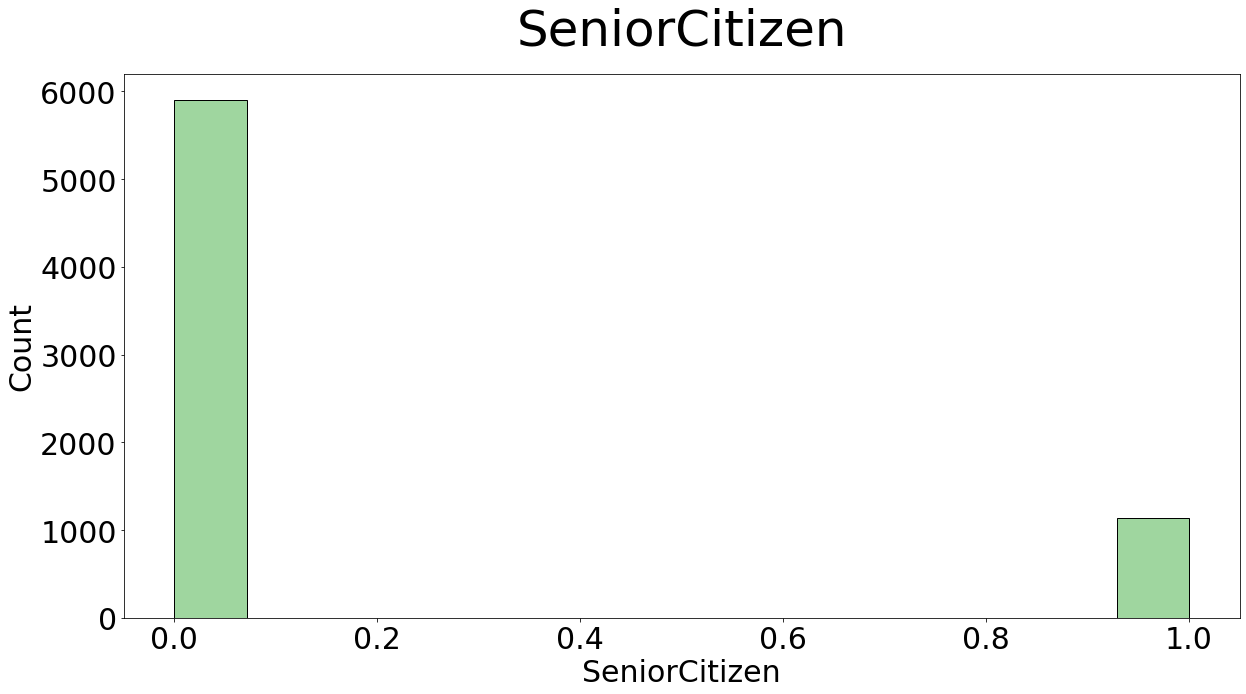

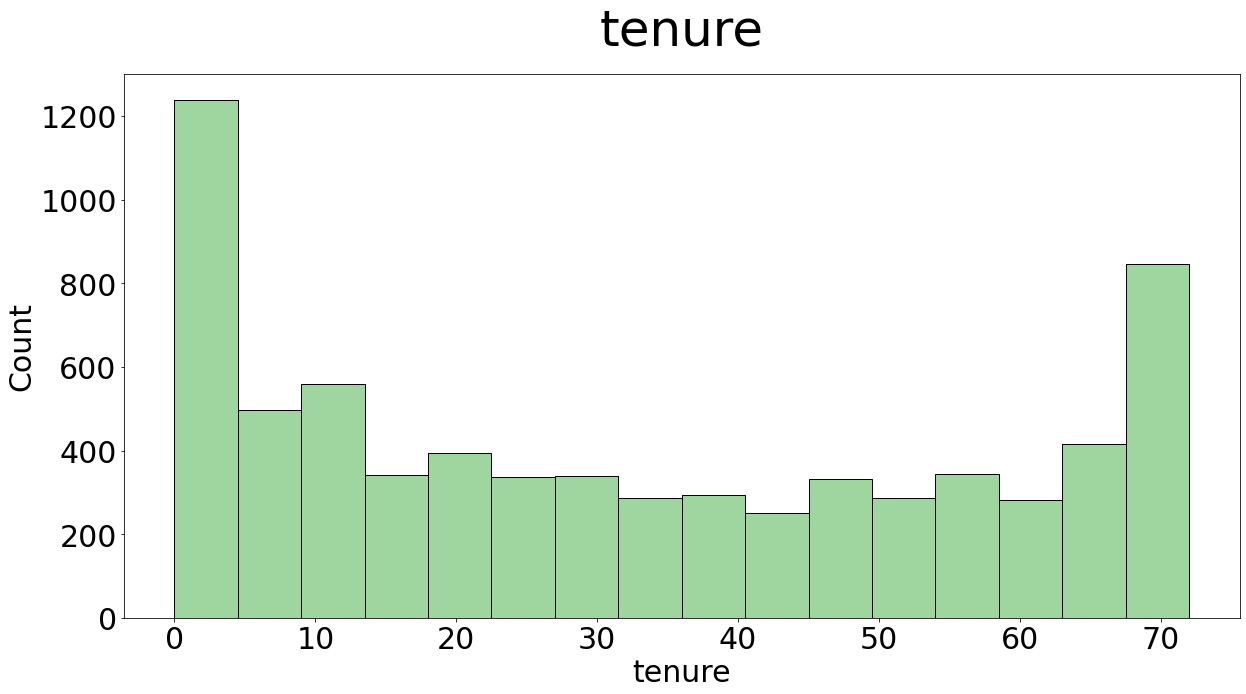

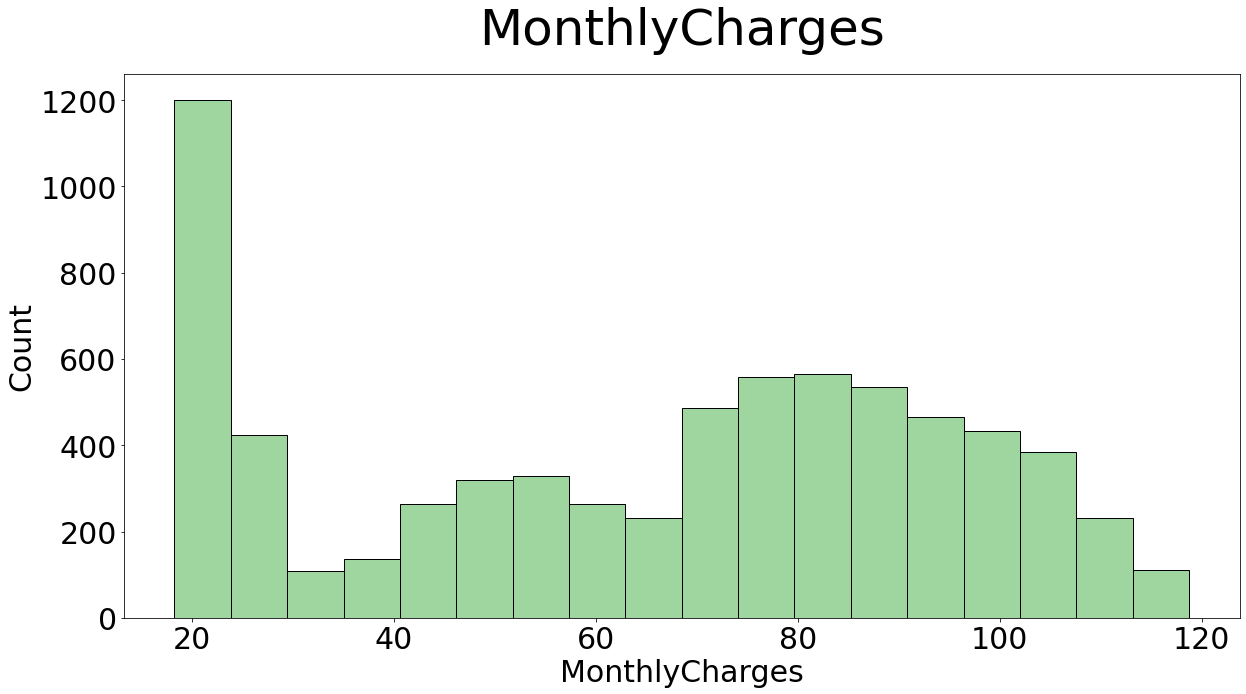

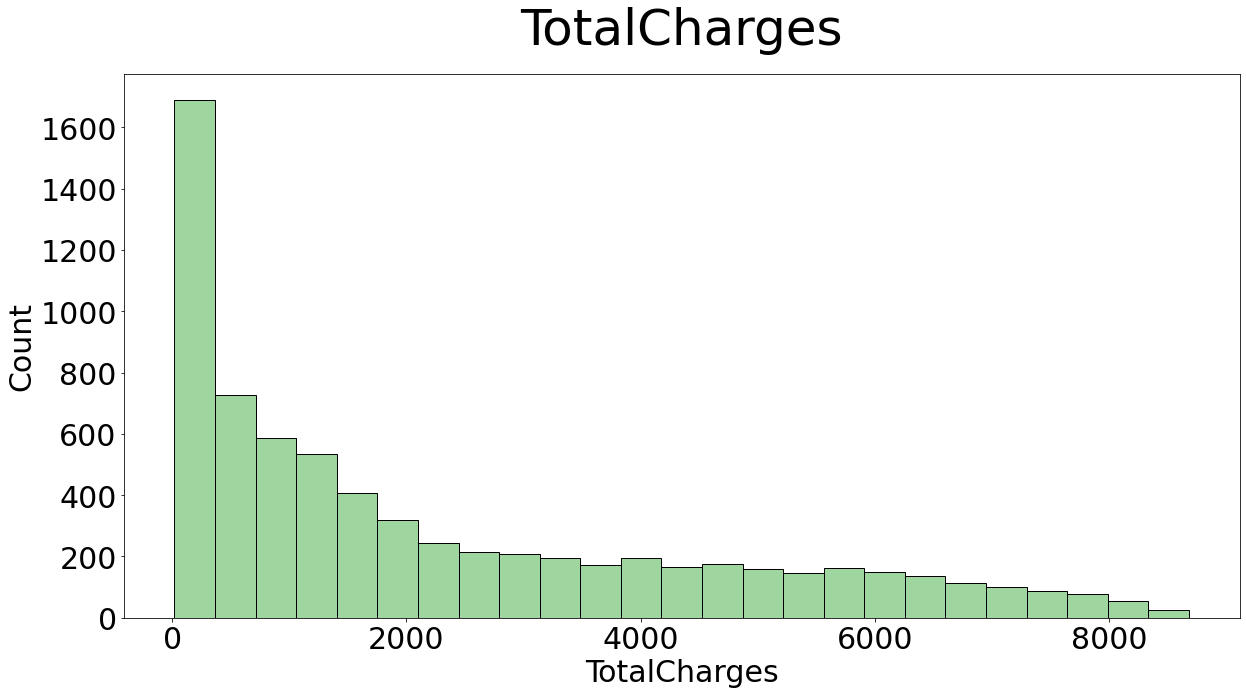

In [16]:
for i in  df.select_dtypes(exclude = 'object').columns:
    
    fig, ax = plt.subplots(figsize = (20,10))
    
    sns.histplot(data = df, 
                 x = i,
                 color=sns.color_palette('Accent', 1),
                )
    ax.tick_params(labelsize=tick_size)
    ax.set_xlabel('{}'.format(i), fontsize=text_size)
    ax.set_ylabel('Count', fontsize=text_size)
    plt.title(i, fontsize=title_size, pad=30)
    
    plt.show();
    
plt.show();

<h6><center>Multivariate Analysis

<h6><center>Further Explorations

In [17]:
# TotalCharges imputations nb : Contract == 'Two Year' => Check two years samples to better 
# imputate  

# No internet service correspondance between InternetService and 'nointernetservice' in 
# other categorical features

<h6><center>Cleaned Dataset Export

df.to_csv('/mnt/d/Kaggle/Telecom_Churn_Prediction/Cleaned/df_cleaned')